CSCI316 Big Data Mining Techniques and Implementation

Group Members:
- Kou Jac Minn 6648393
- Chan Wei Jie 6647509
- Ang Min Ning 6647340
Tutorial Group : 01
Assignment Group : 4

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split #, StratifiedKFold, learning_curve, 
from sklearn.metrics import accuracy_score


In [2]:
#Prior to loading the CSV, we converted the adult.data file into a csv file and manually inserted the column names.
df = pd.read_csv(r'D:\Desktop\CSCI316 Big Data Mining Techniques and Implmentation\Assignment\Group\adult.csv')
print(df)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB



Before diving forward into the data, we noticed that there are several data values that starts off with a whitespace. We then proceed to trim the whitespaces.

In [4]:
#Leading Whitespace Removal
df["workclass"] = df["workclass"].str.replace(" ","")
df["education"] = df["education"].str.replace(" ","")
df["marital-status"] = df["marital-status"].str.replace(" ","")
df["occupation"] = df["occupation"].str.replace(" ","")
df["relationship"] = df["relationship"].str.replace(" ","")
df["race"] = df["race"].str.replace(" ","")
df["sex"] = df["sex"].str.replace(" ","")
df["native-country"] = df["native-country"].str.replace(" ","")
df["income"] = df["income"].str.replace(" ","")

# Data Background
The data provided was extracted from the 1994 Census Database to determine if a person makes over 50 thousand dollars a year. 
The columns for the data is pretty straight forward, aside for the data column "fnlwgt", which stands for "Final Weightage". The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls.
  These are:
          1.  A single cell estimate of the population 16+ for each state.
          2.  Controls for Hispanic Origin by age and sex.
          3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Filtering the Data
While looking at the data set, we can observe that there are 32561 datas. As the amount of data is huge, we are unable to determine whether or not are there missing values in the data set. Looking at the data, we can see that for some attribute, there is a wide range of values opposed to the other. As a result, we will use 2 ways to deduce if there are missing values, namely the .unique() function to see all the different values, or a histogram to check for the spread of data of an attribute.  

# Age

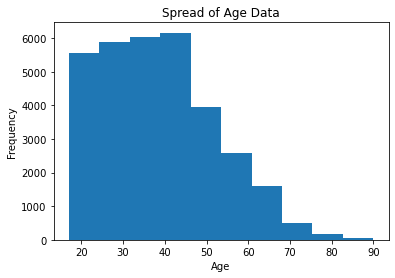

In [5]:
# Histogram to show the spread of the "Age" data
plt.hist(df.age)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Spread of Age Data") 
plt.show()

Looking at the histogram, we can tell that there is a minority of people whose age range falls into the 80 to 90 range. As these people that form the minority are not incorrect data, there is no need to remove them from the data set.

# Workclass

In [6]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

From the output of the unique function, we can see that there is a data named "?", which is considered as missing data. As such, it will be filtered from the data set.

# Final Weight (fnlwgt)

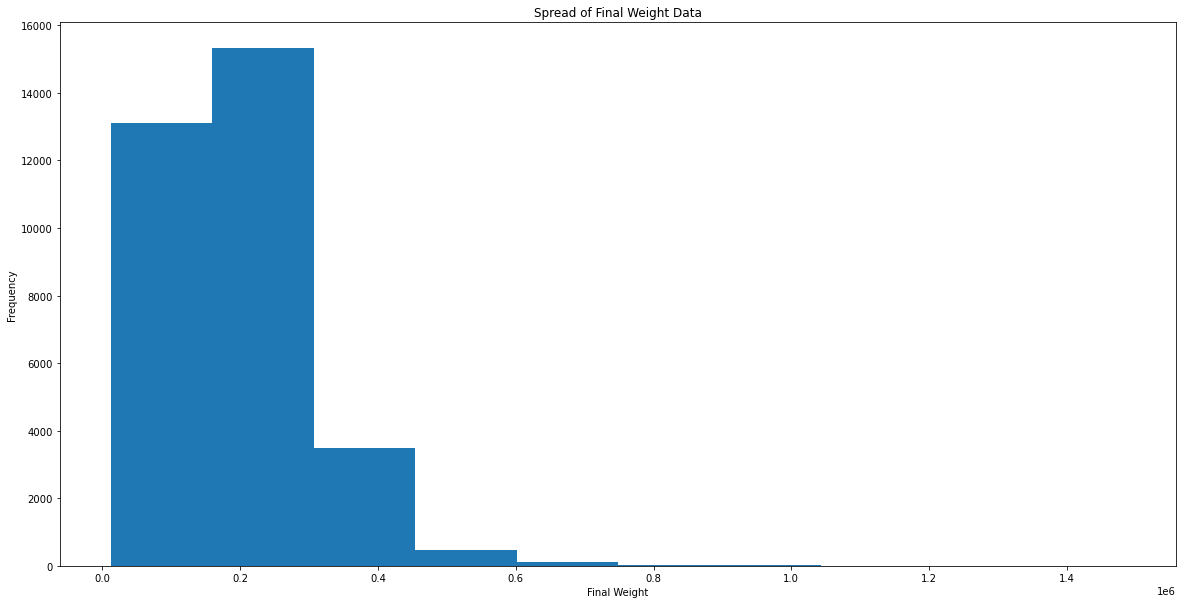

In [7]:
# Histogram to show the spread of the "Age" data
plt.hist(df.fnlwgt)
plt.xlabel("Final Weight")
plt.ylabel("Frequency")
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Spread of Final Weight Data") 
plt.show()

For the Final Weight attribute, it is a pre- processed value and hence there are no missing values from it. There are a few data that deviates from the main spread of the data but as they are not incorrect values, they will not be filtered.

# Education

In [8]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

From the output of the unique function, there are no missing values inside the education column,

# Education Num

In [9]:
df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

From the output of the unique function, there are no missing values inside the education num column,

# Marital Status

In [10]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

From the output of the unique function, there are no missing values inside the marital status column,

# Occupation

In [11]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

From the output of the unique function, we can see that there is a data named "?", which is considered as missing data. As such, it will be filtered from the data set.

# Relationship

In [12]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

From the output of the unique function, there are no missing values inside the relationship column,

# Race

In [13]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

From the output of the unique function, there are no missing values inside the race column,

# Sex

In [14]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

From the output of the unique function, there are no missing values inside the sex column,

# Capital Gain

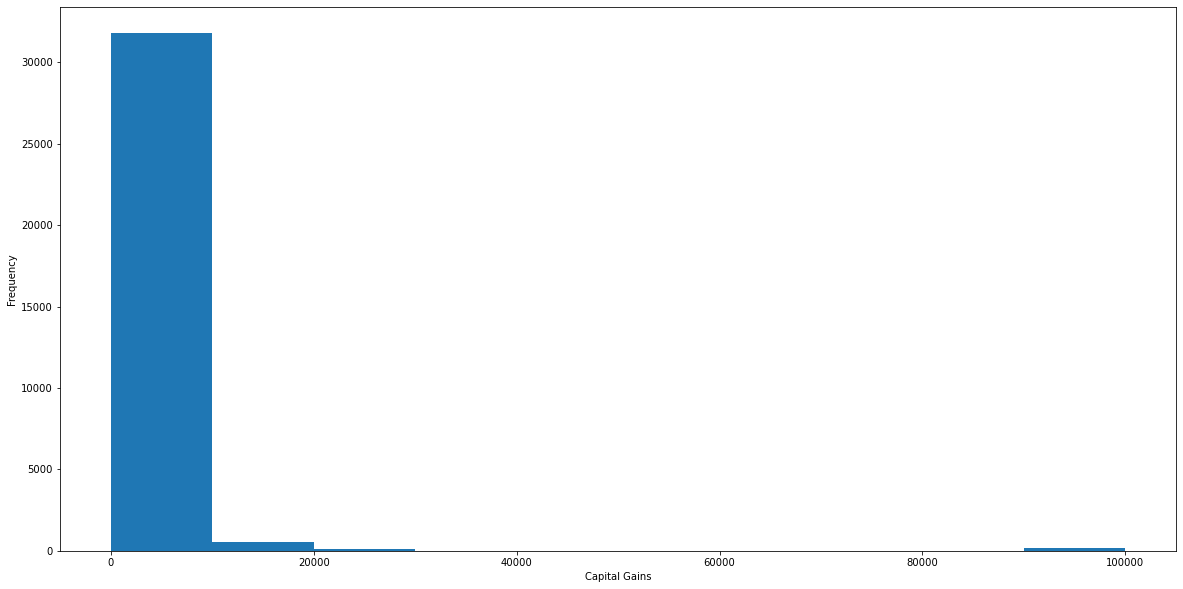

In [15]:
plt.hist(df["capital-gain"])
plt.xlabel("Capital Gains")
plt.ylabel("Frequency")
plt.show()

As we can see from the graph above, majority of the individuals made a capital gain of $0 and only a handful of individuals who gained more than $0. There are no incorrect data in this dataset

# Capital Loss

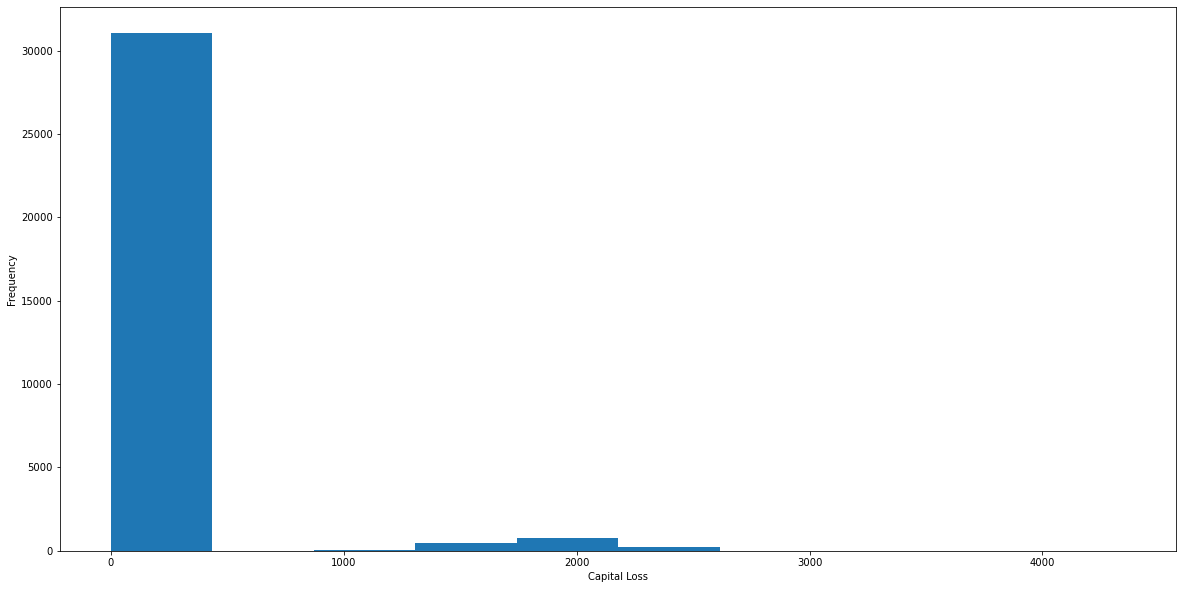

In [16]:
plt.hist(df["capital-loss"])
plt.xlabel("Capital Loss")
plt.ylabel("Frequency")
plt.show()

As we can see from the graph above, majority of the individuals made a capital loss of $0 and only a handful of individuals who lost more than $0. There are no incorrect data in this dataset

# Hours Per Week

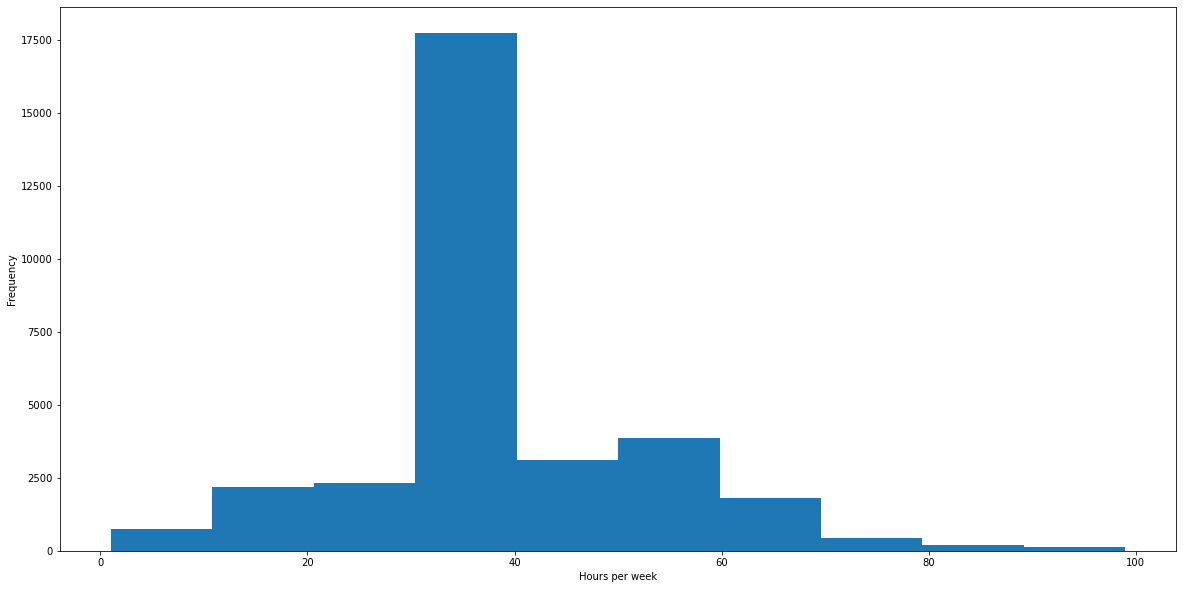

In [17]:
plt.hist(df["hours-per-week"])
plt.xlabel("Hours per week")
plt.ylabel("Frequency")
plt.show()

As we can see from the graph above, majority of the individuals works about 40 hours a week with a handful of them working more than 60 hours a week or less than 20 hours a week. These minorities are not considered as incorrect data and hence will not be filtered.

# Native Country

In [18]:
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

From the output of the unique function, we can see that there is a data named "?", which is considered as missing data. As such, it will be filtered from the data set.

# Income

In [19]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

There are no incorrect values for this attribute

# Removing missing datas

In [20]:
# Remove missing values from workclass attribute
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

As we can see from the dataset above, there are 1836 rows that contains value of '?' we will remove those rows

In [21]:
df = df [df.workclass != '?']
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

All the rows with the value of '?' are removed

In [22]:
# Remove missing values from occupation attribute
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
?                       7
Name: occupation, dtype: int64

As we can see from the dataset above, there are 7 rows that contains value of '?' we will remove those rows

In [23]:
df = df [df.occupation != '?']

In [24]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

All the rows with the value of '?' are removed

In [25]:
# Remove missing values from native country attribute
df['native-country'].value_counts()

United-States                 27504
Mexico                          610
?                               556
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Taiwan                           42
Haiti                            42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                      

As we can see from the dataset above, there are 556 rows that contains value of '?' we will remove those rows

In [26]:
df = df [df['native-country'] != '?']

In [27]:
df['native-country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Taiwan                           42
Haiti                            42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

All the rows with the value of '?' are removed

# Preparing data for machine learning

In [28]:
# convert income into binary, <=50k : 0, >=50k : 1
df.loc[df.income == '<=50K', 'income'] = 0
df.loc[df.income == '>50K', 'income'] = 1
df["income"] = df["income"].astype(int)

# convert sex into binary, female : 0, male: 1
#df.loc[df.sex == 'Female', 'sex'] = 0
#df.loc[df.sex == 'Male', 'sex'] = 1

# convert capital gain into binary, > 0 : 1
df.loc[df['capital-gain'] > 0, 'capital-gain'] = 1

# convert capital loss into binary, > 0 : 1
df.loc[df['capital-loss'] > 0, 'capital-loss'] = 1

# convert marital status into single and married
df.loc[df['marital-status'] == 'Never-married', 'marital-status'] = 'Single'
df.loc[df['marital-status'] == 'Divorced', 'marital-status'] = 'Single'
df.loc[df['marital-status'] == 'Separated', 'marital-status'] = 'Single'
df.loc[df['marital-status'] == 'Widowed', 'marital-status'] = 'Single'
df.loc[df['marital-status'] == 'Married-civ-spouse', 'marital-status'] = 'Married'
df.loc[df['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Married'
df.loc[df['marital-status'] == 'Married-AF-spouse', 'marital-status'] = 'Married'


In [29]:
# auto generate binary format for sex and marital status
# https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
dummy = pd.get_dummies(df, columns=['workclass','education','occupation', 'race', 'relationship', 'native-country', 'sex', 'marital-status'])

In [30]:
#df = pd.concat([df, dummy], axis=1)
dummy.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,sex_Male,marital-status_Married,marital-status_Single
0,39,77516,13,1,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


# Undersampling

In [32]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [75]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = ", accuracy_score(y_actual, y_predicted))
    print("Precision = ", precision_score(y_actual, y_predicted))
    print("Recall = ", recall_score(y_actual, y_predicted))
    print("F1 Score = ", f1_score(y_actual, y_predicted))
    pass

In [76]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr, tpr, label = "AUC ROC Curve with Area Under the curve = " +str (auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [77]:
target = 'income'

In [78]:
X = dummy.loc[:, dummy.columns != target]

In [79]:
Y = dummy.loc[:, dummy.columns == target]

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

0    22654
1     7508
Name: income, dtype: int64


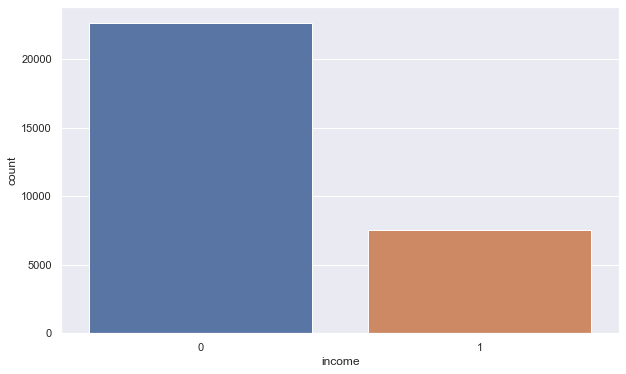

In [81]:
ax = sns.countplot(x=target, data = dummy)
print(dummy[target].value_counts())

In [82]:
100 * (7508/float(df.shape[0]))

24.892248524633644

In [83]:
100 * (22654/float(df.shape[0]))

75.10775147536636

In [84]:
Y_train[target].value_counts()

0    15214
1     4994
Name: income, dtype: int64

In [85]:
clf = LogisticRegression().fit(X_train, Y_train)

In [86]:
Y_Test_Pred = clf.predict(X_test)

In [87]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.7474382157926461
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


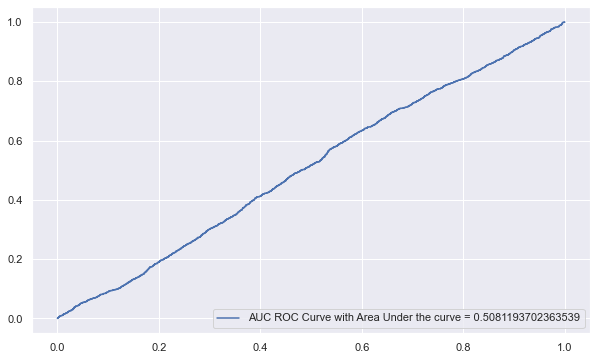

In [88]:
generate_auc_roc_curve(clf, X_test)

In [89]:
minority_class_len = len(dummy[dummy[target] == 1])
print(minority_class_len)

7508


In [91]:
majority_class_indices = dummy[dummy[target] == 0].index
print(majority_class_indices)

Int64Index([    0,     1,     2,     3,     4,     5,     6,    12,    13,
               15,
            ...
            32548, 32549, 32550, 32551, 32552, 32553, 32555, 32556, 32558,
            32559],
           dtype='int64', length=22654)


In [93]:
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
print(len(random_majority_indices))

7508


In [97]:
minority_class_indices = dummy[dummy[target] == 1].index
print(minority_class_len)

Int64Index([    7,     8,     9,    10,    11,    19,    20,    25,    45,
               52,
            ...
            32518, 32519, 32532, 32533, 32536, 32538, 32545, 32554, 32557,
            32560],
           dtype='int64', length=7508)


In [98]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [99]:
under_sample = dummy.loc[under_sample_indices]

<AxesSubplot:xlabel='income', ylabel='count'>

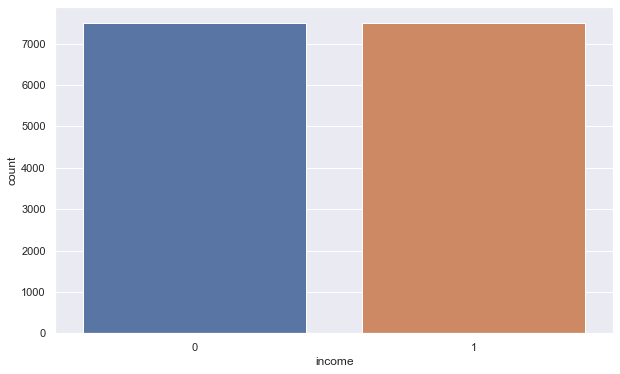

In [102]:
sns.countplot(x = target, data = under_sample)

In [107]:
X = under_sample.loc[:, dummy.columns != target]
Y = under_sample.loc[:, dummy.columns == target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
clf = LogisticRegression().fit (X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [109]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.5623486682808717
Precision =  0.543728423475259
Recall =  0.7642539425798626
F1 Score =  0.6354009077155824


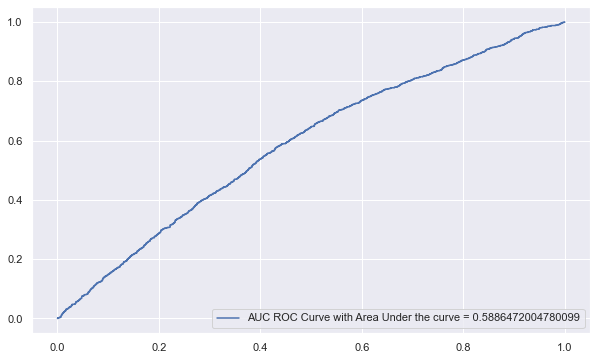

In [124]:
generate_auc_roc_curve(clf, X_test)

In [126]:
model = LinearRegression().fit(X, Y)
model.fit(X_train, Y_train)
LRACC = model.score(X_test, Y_test)
print("LR Accuracy : {}".format(LRACC))

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, Y_train)
KNNACC = model.score(X_test, Y_test)
print("KNN Accuracy : {}".format(KNNACC))
        
model = RandomForestClassifier(n_estimators = 100, max_features = 3)
model.fit(X_train, Y_train)
RFACC = model.score(X_test, Y_test)
print("RF Accuracy: {}".format(RFACC))


LR Accuracy : 0.44172011794113053
KNN Accuracy : 0.5326876513317191
RF Accuracy: 0.7974172719935432


# Calculate the Cross Value Score of the respective classifier models

In [134]:
# Linear Regression Cross Value Score
CVS = cross_val_score(LinearRegression(), X_train, Y_train, cv = 5)
print("Linear Regression:")
print("Mean: " + str(CVS.mean()))
print("STD: " + str(CVS.std()))

Linear Regression:
Mean: 0.4457812349352044
STD: 0.01753056081146308


In [135]:
# K-Nearest Neighbour Cross Value Score
CVS = cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv = 5)
print("K-Nearest Neighbor:")
print("Mean: " + str(CVS.mean()))
print("STD: " + str(CVS.std()))

K-Nearest Neighbor:
Mean: 0.5302186878727634
STD: 0.017899269813673766


In [136]:
# Random Forest Cross Value Score
CVS = cross_val_score(RandomForestClassifier(), X_train, Y_train, cv = 5)
print("Random Forest:")
print("Mean: " + str(CVS.mean()))
print("STD: " + str(CVS.std()))

Random Forest:
Mean: 0.8010934393638172
STD: 0.010893199104710195


In [148]:
#Using random forest mean for fine tuning, as it has the best mean accuracy
param_grid = [
    {'n_estimators' : [100, 200, 300],
        'max_features' : [2, 4, 6, 8]}]

model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 300}

In [150]:
#Test again with fine tuning parameters
finalised = RandomForestClassifier(n_estimators = 300, max_features = 6)
finalised.fit(X_train, Y_train)
predictions = finalised.predict(X_test)
print("Accuracy: %s %%" % (100*accuracy_score(Y_test, predictions)))

Accuracy: 80.16545601291364 %
